In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
data = pd.read_csv('2.csv')

In [14]:
# define df shapes 
n = data.shape[0]
p = data.shape[1]
data = data.values

# split 
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end + 1
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]

In [15]:
# Scale
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)


In [16]:
# test train split 
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]


MSE Train:  0.00782048
MSE Test:  0.041286
loss 0.0069145
MSE Train:  0.0067878
MSE Test:  0.0293286
loss 0.00643014
MSE Train:  0.00679552
MSE Test:  0.0318242
loss 0.00591887
MSE Train:  0.00669863
MSE Test:  0.0316029
loss 0.00593982
MSE Train:  0.00665005
MSE Test:  0.0275059
loss 0.00535966


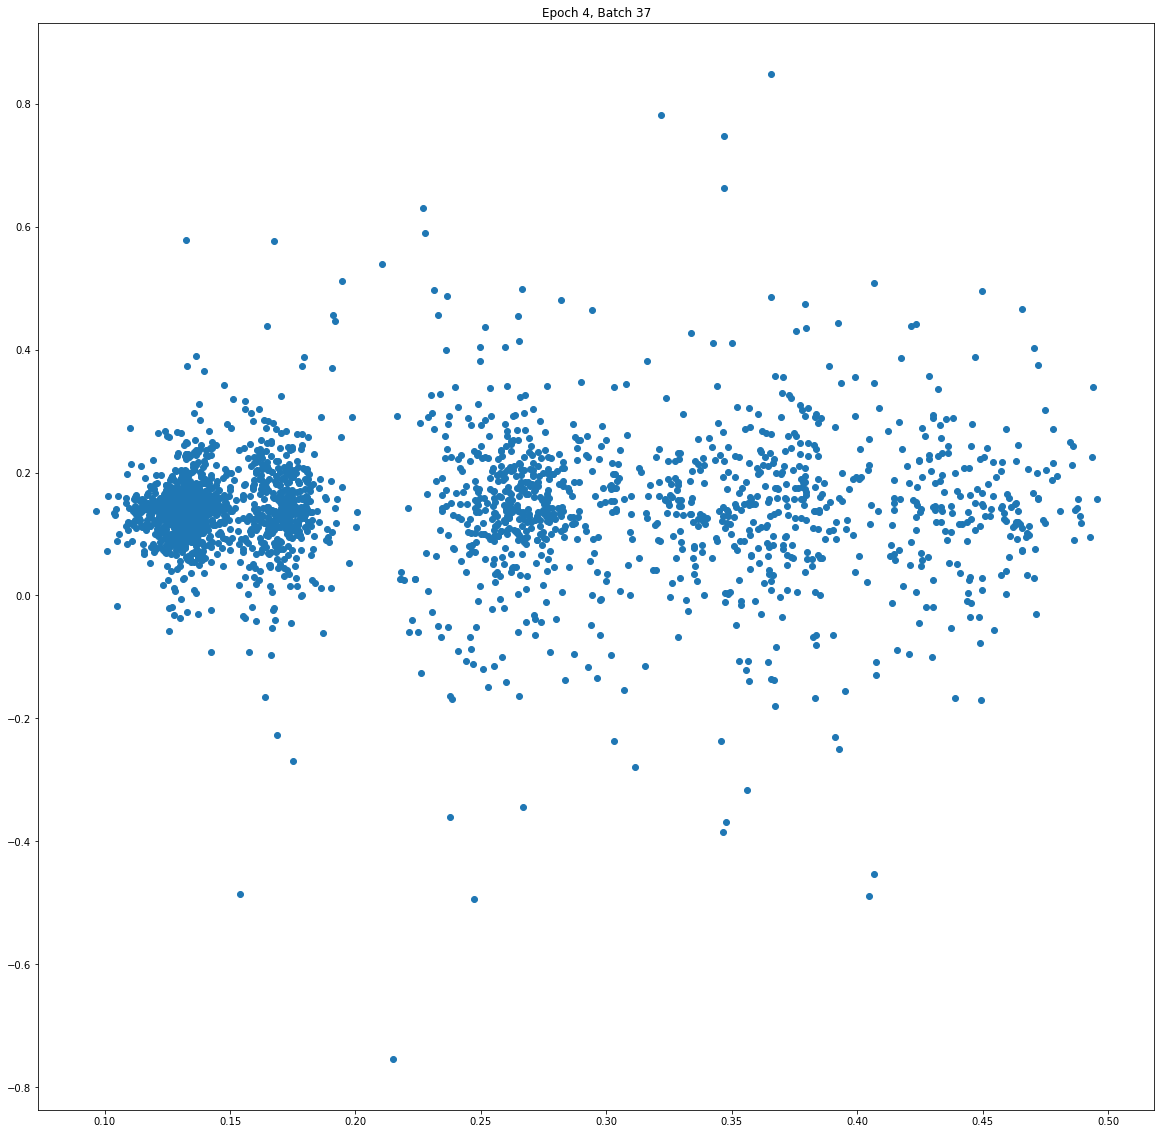

In [26]:
# Neurons
n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128

# Session
net = tf.InteractiveSession()

# Placeholders
X = tf.placeholder(dtype=tf.float32, shape=[None, X_train.shape[1]])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

# Initializers
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
# ^ tf weight xavier ? 
# random normal weight try and see what happens 
# mode to fan_in and fan_out 

bias_initializer = tf.zeros_initializer()

# add dropout in a layer 

# df.dropout . 



# Hidden weights
W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

# Output weights
W_out = tf.Variable(weight_initializer([n_neurons_4, 1]))
bias_out = tf.Variable(bias_initializer([1]))

# Hidden layer
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

# Output 
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))
# tf.nn.softmax to be used if the data is categorical 

# Cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))

# Optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

# globals 
net.run(tf.global_variables_initializer())

# Setup plot
# plt.ion()
# fig = plt.figure()
# ax1 = fig.add_subplot(111)
# line1, = ax1.plot(y_test)
# line2, = ax1.plot(y_test * 0.5)
# plt.show()

# Fit
batch_size = 256
mse_train = []
mse_test = []
evaluate = []


# Run
epochs = 5
for e in range(epochs):

    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})
        
        

        # Show progress
        if np.mod(i, 1000) == 0:
            # MSE train and test
            mse_train.append(net.run(mse, feed_dict={X: X_train, Y: y_train}))
            mse_test.append(net.run(mse, feed_dict={X: X_test, Y: y_test}))
            evaluate.append(mse.eval(feed_dict={X: batch_x, Y: batch_y}))
            print('loss',evaluate[-1])
            print('MSE Train: ', mse_train[-1])
            print('MSE Test: ', mse_test[-1])
            
            # Prediction
            pred = net.run(out, feed_dict={X: X_test})
#             line2.set_ydata(pred[0])


plt.scatter(pred[0],y_test)
plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
plt.pause(0.01)
            

In [31]:
print('RMSE train:',math.sqrt(mse_train[-1]))
print('RMSE test',math.sqrt(mse_test[-1]))
mse_test = net.run(mse, feed_dict={X: X_test, Y: y_test})
mse_train = net.run(mse, feed_dict={X: X_train, Y: y_train})
print('MSE for test data : ',mse_test)
print('MSE for train data : ',mse_train)

RMSE train: 0.08154783405705543
RMSE test 0.16584888948887302
MSE for test data :  0.0321531
MSE for train data :  0.00691153


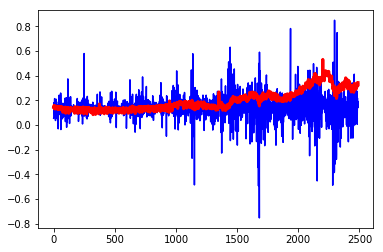

In [19]:

# plt.plot(pred, color='red', label='Prediction')
# plt.plot(y_test, color='blue', label='Ground Truth')
# plt.legend(loc='upper left')
# plt.show()



# plt.plot(mse_train)
# plt.plot(mse_test)
# plt.show()

#             plt.plot(pd.Series(np.ravel(y_test)), "bo", markersize=1, label="Actual")
#             plt.plot(pd.Series(np.ravel(pred)), "r.", markersize=1, label="Forecast")
# plt.figure()




# plot test vs pred to see how the model is doing  
plt.plot(pd.Series(np.ravel(y_test)),'b')
plt.plot(pd.Series(np.ravel(pred)),'r',linewidth=3.0)

plt.rcParams["figure.figsize"] = [20,20]
plt.show()


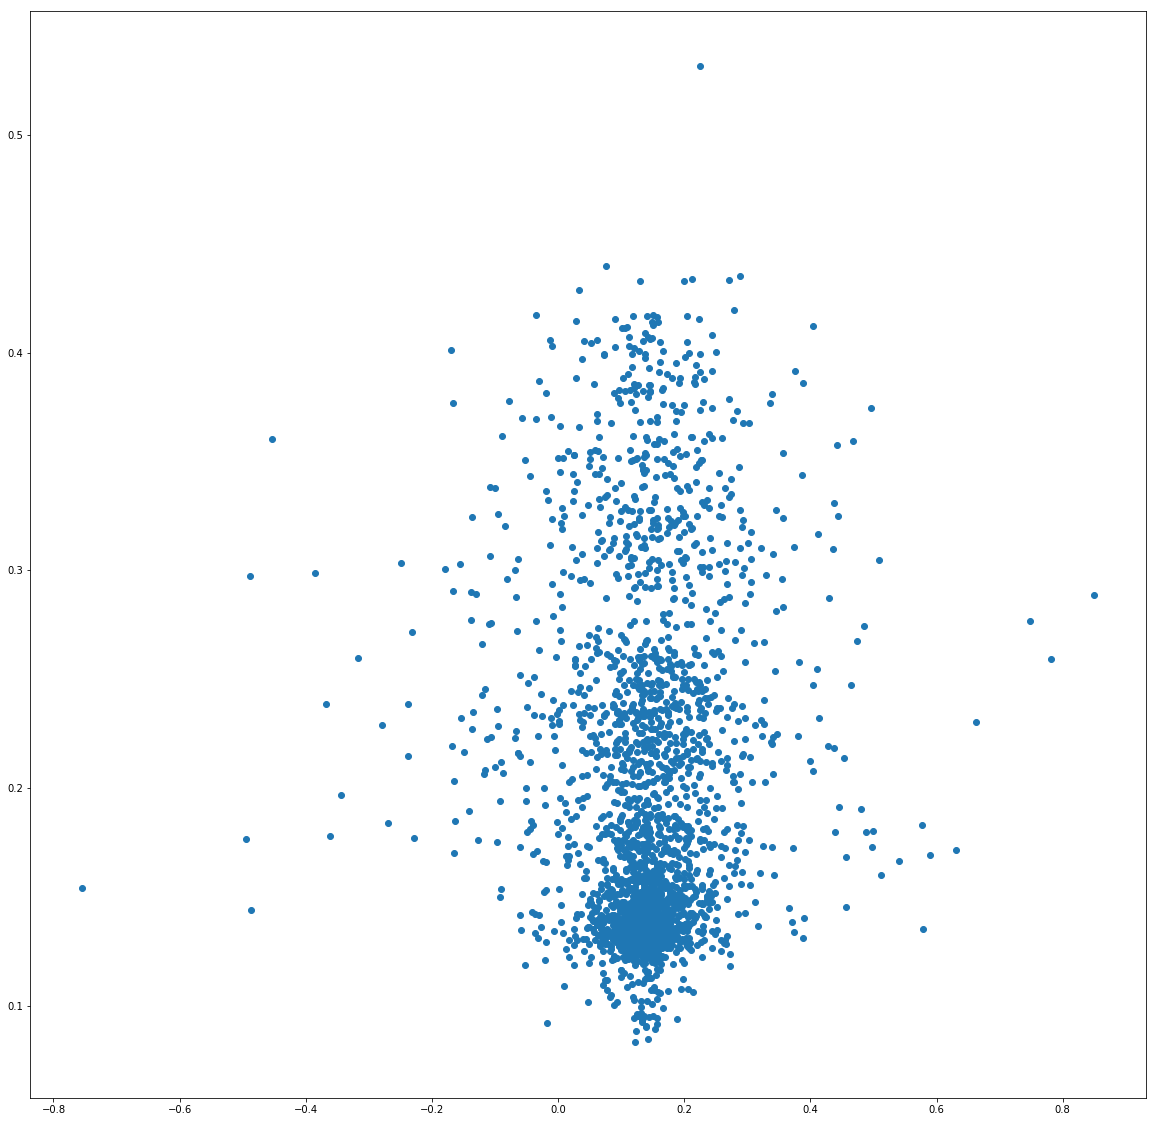

In [20]:

# plt.plot(pd.Series(np.ravel(y_test)),'bo')
# plt.plot(pd.Series(np.ravel(pred)),'r')

# scatter plot . We want the dots to be as close as possible . 
plt.scatter(pd.Series(np.ravel(y_test)),pd.Series(np.ravel(pred)))
plt.show()





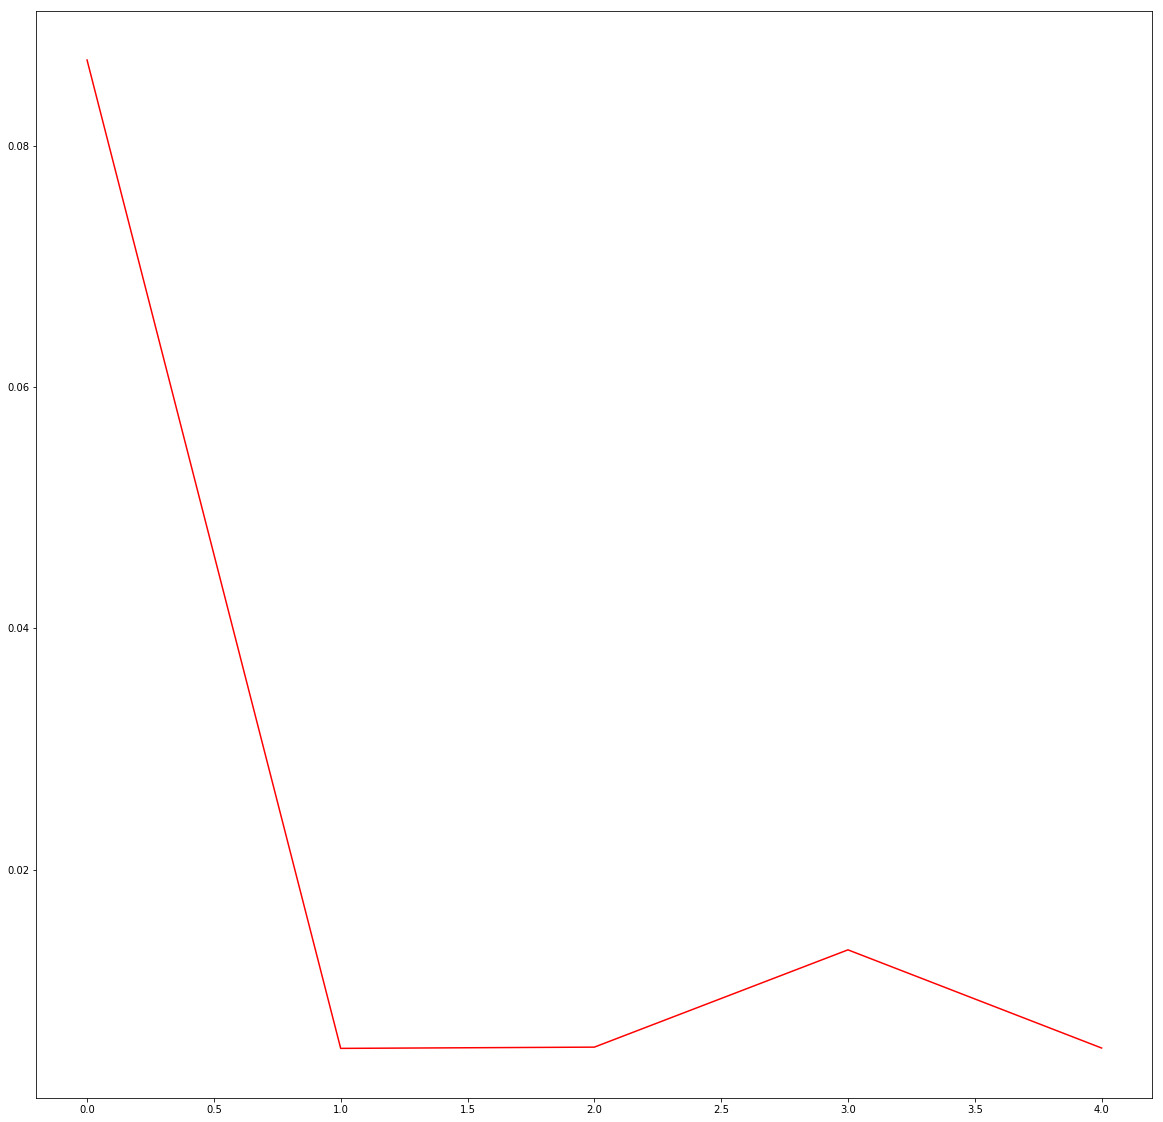

In [21]:
# see how the loss is being reduced 

plt.plot(evaluate,'r')
plt.show()




In [434]:

# test = pd.DataFrame({'wow1':pd.Series(np.ravel(y_test)),'wow2':pd.Series(np.ravel(pred))})
# test.to_csv('output.csv')
